In [37]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [38]:
#import all the things

%reset
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
import cmocean as cm
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)
import xarray as xr 
import subprocess 
import cmocean
from matplotlib import reload
import glob
import geographic_map as gm
from scipy.io import loadmat
import netCDF4 as nc
from IPython.display import HTML
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [39]:
reload(gm)

<module 'geographic_map' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/APRIL_EXP/geographic_map.py'>

## CMOS presentation 2018

#### POINT:

We would like to present the SalishSeaCast carbonate chemistry model, and use this model to illustrate an interesting phenomenon observed in April 2016 - oxygen-enriched/ relatively low-DIC-depleted waters coming in from the Pacific via the Strait of Juan de Fuca and Haro Strait. These are shown in the below image, courtesy of Debby Ianson:

<img src="./APRIL_PROFILES/fig_prof3_april-1.png" alt="Drawing" style="width: 700px;">

here, the *red* dots are the *southern* station, which is station 42 in the GRL dataset. Its coordinates are:
49.03 N -123.49 W (see map below)

the *blue* dots are two *northern* stations. QQ which stations are these? what are their coordinates?

Of course, we do not know at present what the OXY/DIC signal looks like in the model... 

To communicate this effectively, we need a good visualisation of several things. 

1) the physical circulation - we need to show the signal of a discrete watermass, ideally from several angles, to succinctly convince the reader that this circulation happens

    FIG IDEA A: surface streamlines; also streamlines at 30-200 meters' depth
    FIG IDEA B: surface vectors/arrows; also streamlines at 30-200 meters' depth
    FIG IDEA C: u/v speed at a cross  section at station 42, with a bar through the cross section pointing out where station 42 is.
 
2) What's going on in the model compared to the data?
    
    FIG IDEA D: DIC/OXY depth profiles at station 42/ also the north, overlaid on top of a line of Debby's profile. 
    FIG IDEA E: Maybe averaged depth profiles in a box around this station. (like, grey bars on things. Increases our chances of being somewhat right)
    FIG IDEA F (accompanying): Visualisation of where this station is. A box around it if we're doing the averaging idea of E. 
    
    
3) the movement of watermasses themselves, likely visualized as temperature/salinity - some sort of isopycnals?

    FIG IDEA: ?? I think i need to consult D/S on this
    
    

## Domain map with station 42 shown. 

In [40]:
# bath1 = bath.variables['Bathymetry']
# print(bath1)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


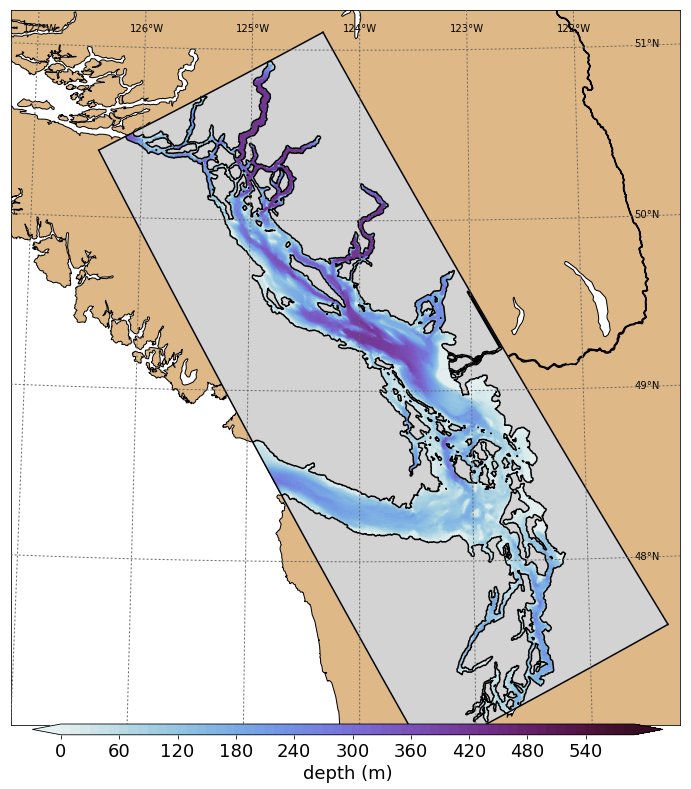

In [41]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

reload(gm)
# Load NEMO grid
grid_NEMO = xr.open_dataset(
    '/home/sallen/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)

T_NEMO = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')

# Load Fraser coastline
PNWrivers = loadmat('/ocean/rich/more/mmapbase/bcgeo/PNWrivers.mat')

# ptt = '/results/SalishSea/nowcast-green/01sep16/'
# tr = 'SalishSea_1d_20160901_20160901_ptrc_T.nc'
# ptt = '/data/tjarniko/results/may10_a1/'
# tr = 'SKOG_1h_20160101_20160115_ptrc_T.nc'
# tracers = nc.Dataset(ptt+tr)
# #print(tracers)

# hrly_dat = tracers.variables['dissolved_inorganic_carbon']
#print(hrly_dat)

# surf_dat = hrly_dat[0,0,:,:]
tplt = bath1[:]

# Define Fraser coastline regions
bounds = [[0, 26000], [61500, 77000], [107500, 114000], [200000, 203000], [326000, 327000]]

# Make figure window
fig, ax = plt.subplots(1, 1, figsize=(12, 15))
gm.plot_map(fig, ax, grid_NEMO, T_NEMO, tplt, w_map = [-127, -121, 47, 51.2], idepth=0)

In [42]:
reload(gm)
# Load NEMO grid
grid_NEMO = xr.open_dataset(
    '/home/sallen/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)

T_NEMO = xr.open_dataset('/data/tjarniko/results/may10_a1/SKOG_1h_20160101_20160115_ptrc_T.nc')

# Load Fraser coastline
PNWrivers = loadmat('/ocean/rich/more/mmapbase/bcgeo/PNWrivers.mat')

# ptt = '/results/SalishSea/nowcast-green/01sep16/'
# tr = 'SalishSea_1d_20160901_20160901_ptrc_T.nc'
ptt = '/data/tjarniko/results/may10_a1/'
tr = 'SKOG_1h_20160101_20160115_ptrc_T.nc'
tracers = nc.Dataset(ptt+tr)
#print(tracers)

hrly_dat = tracers.variables['dissolved_inorganic_carbon']
#print(hrly_dat)

surf_dat = hrly_dat[0,0,:,:]
tplt = surf_dat

# Define Fraser coastline regions
bounds = [[0, 26000], [61500, 77000], [107500, 114000], [200000, 203000], [326000, 327000]]

# Make figure window
fig, ax = plt.subplots(1, 1, figsize=(12, 15))

# Plot Model Domain
#(fig, ax, grid, T, tplt, w_map = [-127, -121, 47, 51.2], idepth=0)
gm.plot_map(fig, ax, grid_NEMO, T_NEMO, tplt, w_map = [-127, -121, 47, 51.2], idepth=0)

OSError: No such file or directory

# 

## DIC anomaly 

In [ ]:
HTML("""
<video width="960" height="720" controls>
  <source src="./PRES_PLOT/movie_dic_ra_zl_22range-5050_sp.mp4" type="video/mp4">
</video>
""")

In [ ]:
HTML("""
<video width="960" height="720" controls>
  <source src="./PRES_PLOT/movie_dic_ra_zl_22range-5050_3s.mp4" type="video/mp4">
</video>
""")

# DIC normalized

In [ ]:
 HTML("""
<video width="960" height="720" controls>
  <source src="./PRES_PLOT/movie_dic_n_zl_22range21502250_3s.mp4" type="video/mp4">
</video>
""")

In [ ]:
 HTML("""
<video width="960" height="720" controls>
  <source src="./PRES_PLOT/movie_dic_n_zl_22range20502150_3s.mp4" type="video/mp4">
</video>
""")

In [ ]:
 HTML("""
<video width="960" height="720" controls>
  <source src="./PRES_PLOT/movie_oxy_zl_22range715_3s.mp4" type="video/mp4">
</video>
""")